<a href="https://colab.research.google.com/github/Mizanur4E/ACI_MLE/blob/main/PrescriptionOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image processing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
def imagePreprocessing(image):

  #image resizing, gray scaling, binarization and inversion
  
  down_width = 256
  down_height = 128
  down_points = (down_width, down_height)
  resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)


  grayImage = cv2.cvtColor(resized_down, cv2.COLOR_BGR2GRAY)
  et,thresh1 = cv2.threshold(grayImage,125, 255, cv2.THRESH_OTSU)

  inv = cv2.bitwise_not(thresh1)

  return inv


In [ ]:
# import os
# #src_dir = '../formatter/all_speech'
# tar_dir =  '/content/drive/My Drive/ACI/PrescriptionOCR/'


# with os.scandir(tar_dir) as dirs:

#     for dir in dirs:
      
#       rootpath = '/content/drive/My Drive/ACI/PrescriptionOCR/processedImages/'+ str(dir)[11:-2]
#       os.mkdir(rootpath)
#       #print(str(dir)[11:-2])
#       with os.scandir(dir) as img_dirs:
#         for img in img_dirs:

#           img = str(img)
#           img = os.path.join(dir,img[11:-2])
#           a= cv2.imread(img)

#           path = rootpath +'/'+ img[-10:]
#           print(path)
#           try: 
#             cv2_imshow(a)
#             inv = imagePreprocessing(a)
#             try:
#               cv2.imwrite(path, inv)
#               print('successful')
#             except:
#               print("error")
#           except:
#             pass
#           print(img[-10:])
            
#     print('Done!!!')

## Image Augmentation

Image augmentation and labeling

In [ ]:
img_height= 256
img_width = 256

In [ ]:
import os
tar_dir =  '/content/drive/My Drive/ACI/PrescriptionOCR/processedImages'
with os.scandir(tar_dir) as dirs:

    labels = {}
    i =0
    for dir in dirs:
      
      a = str(dir)[11:-2]
      labels[a]=i
      i = i+1
      if i == 11:
        break
print(labels)

{'revital': 0, 'emixef': 1, 'vave': 2, 'povital': 3, 'cefim': 4, 'pantonix': 5, 'paricel': 6, 'algin': 7, 'motigut': 8, 'xeldrin': 9, 'doxim': 10}


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras import layers

train_ds= tf.keras.utils.image_dataset_from_directory(
    tar_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    batch_size = 32)

val_ds= tf.keras.utils.image_dataset_from_directory(
    tar_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    batch_size = 32)

Found 186 files belonging to 11 classes.
Using 168 files for training.
Found 186 files belonging to 11 classes.
Using 18 files for validation.


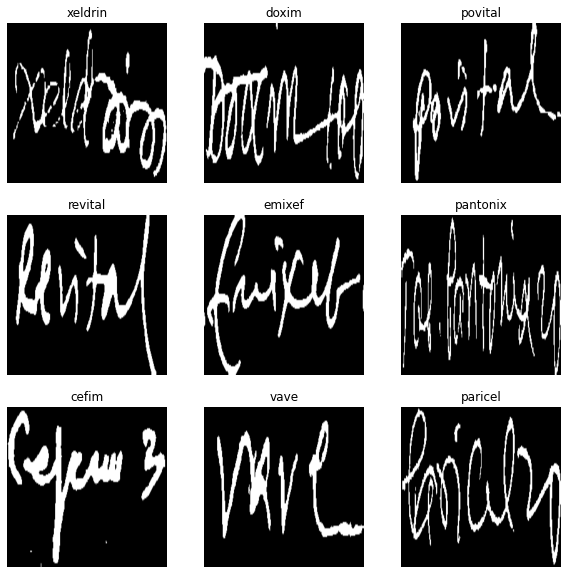

In [ ]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [ ]:
epochs=26
history = model.fit(
  train_ds, epochs=epochs,validation_data=val_ds
)

Epoch 1/26
6/6 [==============================] - 13s 2s/step - loss: 3.0775 - accuracy: 0.1310 - val_loss: 2.2272 - val_accuracy: 0.3333
Epoch 2/26
6/6 [==============================] - 12s 2s/step - loss: 2.3104 - accuracy: 0.1548 - val_loss: 2.2507 - val_accuracy: 0.3333
Epoch 3/26
6/6 [==============================] - 12s 2s/step - loss: 2.2424 - accuracy: 0.2321 - val_loss: 1.9507 - val_accuracy: 0.2778
Epoch 4/26
6/6 [==============================] - 12s 2s/step - loss: 2.0449 - accuracy: 0.2857 - val_loss: 1.5860 - val_accuracy: 0.6111
Epoch 5/26
6/6 [==============================] - 12s 2s/step - loss: 1.7799 - accuracy: 0.4226 - val_loss: 1.3300 - val_accuracy: 0.5000
Epoch 6/26
6/6 [==============================] - 12s 2s/step - loss: 1.5451 - accuracy: 0.4643 - val_loss: 1.1147 - val_accuracy: 0.6111
Epoch 7/26
6/6 [==============================] - 12s 2s/step - loss: 1.5157 - accuracy: 0.5238 - val_loss: 1.2528 - val_accuracy: 0.5556
Epoch 8/26
6/6 [==================

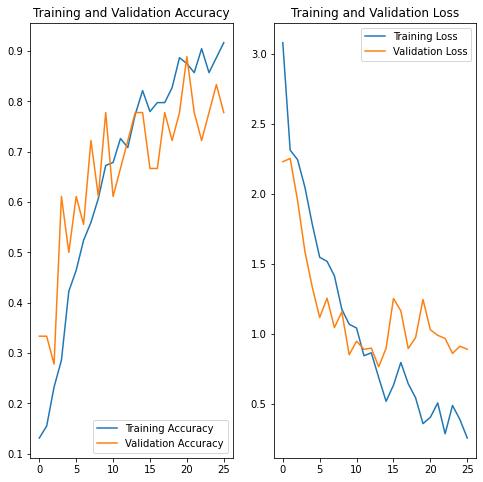

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

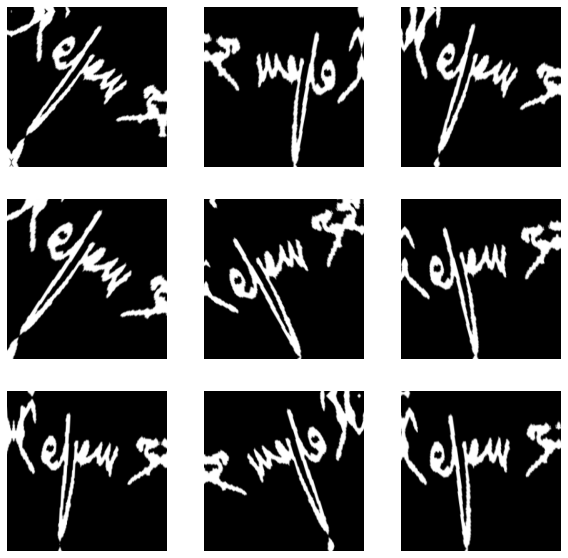

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
pip install craft-text-detector

In [ ]:
# import Craft class
from craft_text_detector import Craft

# set image path and export folder directory
image = '/content/drive/My Drive/ACI/PrescriptionOCR/povital/000003.png' # can be filepath, PIL image or numpy array
output_dir = '/content/drive/My Drive/ACI/PrescriptionOCR/'

# create a craft instance 
craft = Craft(output_dir=output_dir, crop_type="poly", cuda=False)

# apply craft text detection and export detected regions to output directory
prediction_result = craft.detect_text(image)

# unload models from ram/gpu
craft.unload_craftnet_model()
craft.unload_refinenet_model()

In [ ]:
# Copyright 2019 D-Wave Systems, Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# ------ Import necessary packages ----
from collections import defaultdict

import networkx as nx

import matplotlib
matplotlib.use("agg")
# importing networkx

# importing matplotlib.pyplot
import matplotlib.pyplot as plt

import scipy.io
J_mat = scipy.io.loadmat('J16.mat')
J = J_mat["J"]
print(J.shape)

J_mapped = []
edge =0;
for i in range(J.shape[0]):
    for j in range(i,J.shape[1]):
        if J[i,j] == 1:
            J_mapped.append((i+1,j+1))
            edge = edge +1

print(J_mapped)
print(edge)




G = nx.Graph()
G.add_edges_from(J_mapped)
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='#B7B4B3', font_color='#060505',font_size=18, linewidths=2)






(16, 16)
[(1, 6), (1, 7), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 16), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 13), (2, 14), (2, 16), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 7), (4, 10), (4, 11), (4, 12), (5, 6), (5, 11), (5, 12), (5, 13), (6, 9), (6, 10), (6, 11), (6, 12), (6, 14), (6, 16), (7, 8), (7, 9), (7, 11), (7, 13), (7, 16), (8, 11), (8, 12), (8, 13), (8, 14), (9, 10), (9, 12), (9, 13), (9, 15), (10, 11), (10, 14), (10, 15), (11, 15), (11, 16), (12, 13), (12, 14), (12, 16), (13, 15), (13, 16), (14, 15), (14, 16)]
65


In [ ]:

plt.savefig("size16C.svg",dpi=180)

In [ ]:
import matplotlib.pyplot as plt
limits = plt.axis("off")